In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import torch
import numpy as np
from einops import rearrange, pack
from voxelnet import Voxelization

v = Voxelization(x_min=0,x_max=70.4,y_min=-40,y_max=40,z_min=-3,z_max=1,
                 voxel_size=[0.2,0.2,0.4],max_voxel_pts=35)

# generate fake point cloud
N = 10000
x = 5*np.random.randn(N)
y = 5*np.random.randn(N)
z = 3*np.random.randn(N)
i=0
print(x[i],y[i],z[i])
pc = np.concatenate([x,y,z]).reshape((3,-1)).T
print(pc[i,:])
# pc = torch.from_numpy(pc).to(torch.float32)

print(v.spatial_shape_DHW)
print(pc.shape)

4.750504044413036 -7.307612465066395 -2.7244448090516546
[ 4.75050404 -7.30761247 -2.72444481]
[10, 400, 352]
(10000, 3)


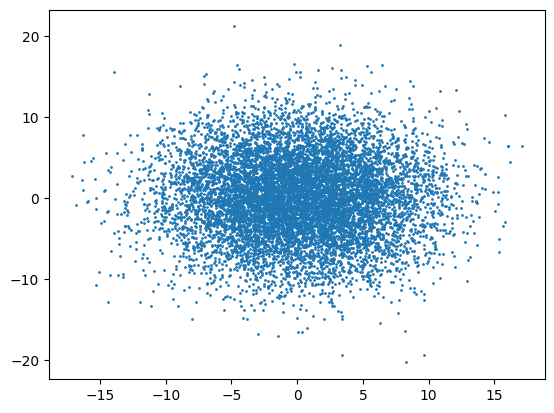

In [33]:
import matplotlib.pyplot as plt
plt.scatter(x,y,1)
plt.show()

In [37]:
voxel, coord, mask = v(pc)

In [38]:
voxel.shape

(3000, 35, 6)

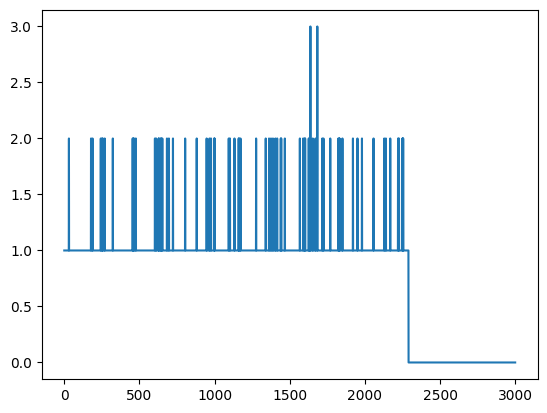

In [40]:
tmp = mask.sum(axis=1)
import matplotlib.pyplot as plt
plt.plot(tmp)

In [8]:
vox_center_batch.shape

torch.Size([2339, 3])

In [9]:
coord_batch

tensor([[  0.,   0., 138.,  21.],
        [  0.,   0., 140.,  12.],
        [  0.,   0., 141.,   9.],
        ...,
        [  0.,   9., 249.,   5.],
        [  0.,   9., 254.,  14.],
        [  0.,   9., 259.,  17.]])

In [10]:
torch.max(coord_batch, dim=0)

torch.return_types.max(
values=tensor([  0.,   9., 282.,  86.]),
indices=tensor([   0, 2098,  610, 1345]))

In [11]:
mask_batch.shape

torch.Size([2339, 35])

In [12]:
coord_batch[:20]

tensor([[  0.,   0., 138.,  21.],
        [  0.,   0., 140.,  12.],
        [  0.,   0., 141.,   9.],
        [  0.,   0., 145.,   4.],
        [  0.,   0., 146.,   2.],
        [  0.,   0., 148.,   3.],
        [  0.,   0., 151.,  12.],
        [  0.,   0., 152.,   2.],
        [  0.,   0., 153.,   5.],
        [  0.,   0., 155.,   4.],
        [  0.,   0., 155.,  32.],
        [  0.,   0., 158.,  10.],
        [  0.,   0., 159.,   9.],
        [  0.,   0., 160.,  27.],
        [  0.,   0., 162.,  21.],
        [  0.,   0., 165.,  34.],
        [  0.,   0., 168.,  24.],
        [  0.,   0., 170.,   4.],
        [  0.,   0., 170.,  12.],
        [  0.,   0., 170.,  48.]])

In [13]:
from voxel_feature import VoxelFeatureExtractionLayer

vfe = VoxelFeatureExtractionLayer(n_feat_in=6, n_feat_out=8,
                                  append_aggregate=True)

In [14]:
out = vfe(voxel_batch, mask_batch)
out.shape

torch.Size([2339, 35, 8])

In [15]:
from voxel_feature import VoxelFeatureExtraction

voxel_feature = VoxelFeatureExtraction(n_feat_in=6,
                                        n_hidden_per_layer=[8,8],
                                        n_feat_out=8,)

In [16]:
out = voxel_feature(voxel_batch, mask_batch)
out.shape

torch.Size([2339, 8])

In [17]:
from einops import reduce
def find_batch_size(coord_batch):
    return reduce(coord_batch[:,0],"b -> 1","max").squeeze().numpy().item()+1

batch_size = find_batch_size(coord_batch)
batch_size = int(batch_size)
print(batch_size)

1


In [18]:
v.spatial_shape_DHW

[10, 400, 352]

In [18]:
from spatial_conv import SpatialConvolution

sp = SpatialConvolution(n_feat_in=8, to_BEV=True)

out1 = sp(out, coord_batch.to(torch.int32), v.spatial_shape_DHW, batch_size)
out1.shape

/home/ji/anaconda3/envs/torch/lib/python3.8/site-packages/torch/jit/_recursive.py:313: UserWarning: 'bias' was found in ScriptModule constants,  but it is a non-constant parameter. Consider removing it.
  warnings.warn(


RuntimeError: 
Unknown type name 'np.ndarray':
  File "/home/ji/anaconda3/envs/torch/lib/python3.8/site-packages/spconv/pytorch/core.py", line 136
                 features: torch.Tensor,
                 indices: torch.Tensor,
                 spatial_shape: Union[List[int], np.ndarray],
                                                 ~~~~~~~~~~ <--- HERE
                 batch_size: int,
                 grid: Optional[torch.Tensor] = None,
'SparseConvTensor.__init__' is being compiled since it was called from '__torch__.spconv.pytorch.core.SparseConvTensor'
  File "/home/ji/anaconda3/envs/torch/lib/python3.8/site-packages/spconv/pytorch/conv.py", line 753
    def forward(self,
                input: SparseConvTensor,
                       ~~~~~~~~~~~~~~~~ <--- HERE
                add_input: Optional[SparseConvTensor] = None):
        return self._conv_forward(self.training,
'__torch__.spconv.pytorch.core.SparseConvTensor' is being compiled since it was called from 'SparseConv3d.forward'
  File "/home/ji/anaconda3/envs/torch/lib/python3.8/site-packages/spconv/pytorch/conv.py", line 752
    def forward(self,
    ~~~~~~~~~~~~~~~~~
                input: SparseConvTensor,
                ~~~~~~~~~~~~~~~~~~~~~~~~
                add_input: Optional[SparseConvTensor] = None):
                ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        return self._conv_forward(self.training,
        ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                  input,
                                  ~~~~~~
                                  self.weight,
                                  ~~~~~~~~~~~~
                                  self.bias,
                                  ~~~~~~~~~~
                                  add_input,
                                  ~~~~~~~~~~
                                  name=self.name,
                                  ~~~~~~~~~~~~~~~
                                  sparse_unique_name=self._sparse_unique_name,
                                  ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                                  act_type=self.act_type,
                                  ~~~~~~~~~~~~~~~~~~~~~~~
                                  act_alpha=self.act_alpha,
                                  ~~~~~~~~~~~~~~~~~~~~~~~~~
                                  act_beta=self.act_beta)
                                  ~~~~~~~~~~~~~~~~~~~~~~ <--- HERE


In [23]:
import torch
from torch import jit
from spatial_conv import SpatialConvolution

sp = SpatialConvolution(n_feat_in=8, to_BEV=True)

sp_compile = torch.compile(sp)

In [24]:
sp_compile

OptimizedModule(
  (_orig_mod): SpatialConvolution(
    (net): SparseSequential(
      (0): SparseConv3d(8, 64, kernel_size=[3, 3, 3], stride=[2, 1, 1], padding=[1, 1, 1], dilation=[1, 1, 1], output_padding=[0, 0, 0], algo=ConvAlgo.Native)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): SparseConv3d(64, 64, kernel_size=[3, 3, 3], stride=[1, 1, 1], padding=[0, 1, 1], dilation=[1, 1, 1], output_padding=[0, 0, 0], algo=ConvAlgo.Native)
      (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): SparseConv3d(64, 64, kernel_size=[3, 3, 3], stride=[2, 1, 1], padding=[1, 1, 1], dilation=[1, 1, 1], output_padding=[0, 0, 0], algo=ConvAlgo.Native)
      (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU()
    )
  )
)

In [30]:
out1 = sp_compile(out, coord_batch.to(torch.int32), v.spatial_shape_DHW, batch_size)
out1.shape

torch.Size([1, 128, 400, 352])

In [38]:
import torch
import spconv.pytorch as spconv
# your example, assume 2 is batch size. you must make a batch axis before call to_sparse
torchTensor = torch.rand(2, 5, 10, 10)
torchTensorSp = torchTensor.to_sparse() # no channel axis here. equalivant to torchTensor.ndim
indices_th = torchTensorSp.indices().permute(1, 0).contiguous()
# sparse tensor features need to have one channel axis.
features_th = torchTensorSp.values().view(-1, 1)
# after to_sparse, spatial shape is [5, 10, 10], batch size is 2
# sparse tensor must have a batch axis, spatial shape dont contain batch axis.
sp_t = spconv.SparseConvTensor(features_th, indices_th.to(torch.int32), torchTensor.shape[1:], 2)
conv = spconv.SparseConv3d(1, 5, 3, 1, 0,algo=spconv.ConvAlgo.Native)
y_out = conv(sp_t)

In [39]:
indices_th

tensor([[0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 2],
        ...,
        [1, 4, 9, 7],
        [1, 4, 9, 8],
        [1, 4, 9, 9]])

In [31]:
from rpn import RegionProposalNet

rpn = RegionProposalNet()

In [36]:
out2 = rpn(out1)

In [131]:
out2[0].shape

torch.Size([1, 2, 200, 176])

In [1]:
out2[1].shape

NameError: name 'out2' is not defined